In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
import numpy as np
import matplotlib.pyplot as plt

# Image d'entrée

In [ ]:
# Format : (nombre d'images, hauteur, largeur, canaux)
input_image = np.random.rand(1, 5, 5, 3).astype(np.float32)

# Modèle CNN

In [ ]:
model = tf.keras.Sequential([
    Conv2D(
        filters=1,
        kernel_size=(3, 3),
        input_shape=(5, 5, 3)
    )
])

# Le modèle a maintenant son propre filtre initialisé au hasard.
# On applique directement la convolution.
output_feature_map = model.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


# Dimensions

In [ ]:
print("Dimension de l'image d'entrée:", input_image.shape)
print("Dimension de la carte de caractéristiques en sortie:", output_feature_map.shape)

Dimension de l'image d'entrée: (1, 5, 5, 3)
Dimension de la carte de caractéristiques en sortie: (1, 3, 3, 1)


In [ ]:
# Fonction pour afficher une matrice avec les valeurs dans chaque case
def annotate_heatmap(ax, matrix, title):
    ax.imshow(matrix, cmap='viridis')
    ax.set_title(title)
    # Boucle sur chaque case pour y écrire sa valeur
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            # On formate à 2 décimales pour la lisibilité
            ax.text(j, i, f"{matrix[i, j]:.2f}",
                    ha="center", va="center", color="w")
    ax.grid(False)

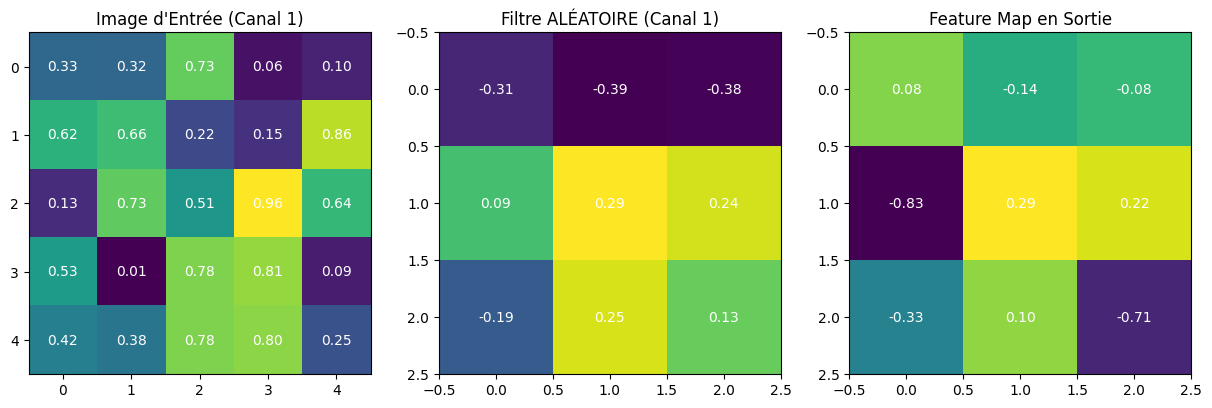

In [ ]:
# Extraire le filtre aléatoire que le modèle a créé
filters, _ = model.layers[0].get_weights()

# Créer les graphiques
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Afficher l'image d'entrée (Canal 1)
annotate_heatmap(axs[0], input_image[0, :, :, 0], "Image d'Entrée (Canal 1)")

# Afficher le filtre (Canal 1)
annotate_heatmap(axs[1], filters[:, :, 0, 0], "Filtre ALÉATOIRE (Canal 1)")

# Afficher la carte de caractéristiques
# np.squeeze enlève les dimensions superflues
annotate_heatmap(axs[2], np.squeeze(output_feature_map), "Feature Map en Sortie")

plt.show()

# 2 filtres

In [ ]:
# Format : (nombre d'images, hauteur, largeur, canaux)
input_image = np.random.rand(1, 5, 5, 3).astype(np.float32)

In [ ]:
model = tf.keras.Sequential([
    Conv2D(
        filters=2,             # On demande DEUX filtres
        kernel_size=(3, 3),
        input_shape=(5, 5, 3),
        strides=(2,2),
        padding='same',
        use_bias=True
    )
])

# Le modèle a maintenant DEUX filtres distincts, initialisés au hasard.
output_feature_maps = model.predict(input_image)

print(f"Dimension des filtres : {model.layers[0].get_weights()[0].shape}")
print(f"Dimension de la sortie (feature maps) : {output_feature_maps.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Dimension des filtres : (3, 3, 3, 2)
Dimension de la sortie (feature maps) : (1, 3, 3, 2)


In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 2)        │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fonction pour afficher une matrice avec les valeurs dans chaque case
def annotate_heatmap(ax, matrix, title):
    ax.imshow(matrix, cmap='viridis')
    ax.set_title(title)
    # Boucle sur chaque case pour y écrire sa valeur
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            # On formate à 2 décimales pour la lisibilité
            ax.text(j, i, f"{matrix[i, j]:.2f}",
                    ha="center", va="center", color="w")
    ax.grid(False)

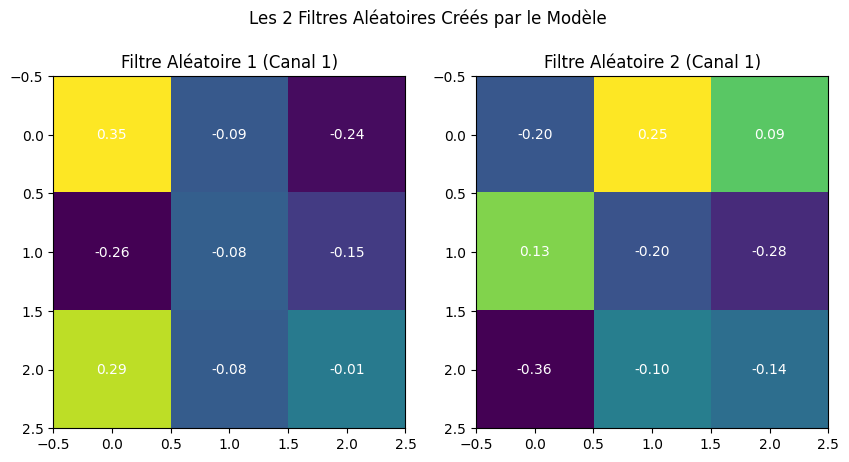

In [ ]:
# Extraire les deux filtres aléatoires que le modèle a créés
filters, _ = model.layers[0].get_weights()

# Créer les graphiques pour les deux filtres
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Les 2 Filtres Aléatoires Créés par le Modèle')

# Afficher le premier filtre (Canal 1)
annotate_heatmap(axs[0], filters[:, :, 0, 0], "Filtre Aléatoire 1 (Canal 1)")

# Afficher le deuxième filtre (Canal 1)
annotate_heatmap(axs[1], filters[:, :, 0, 1], "Filtre Aléatoire 2 (Canal 1)")

plt.show()

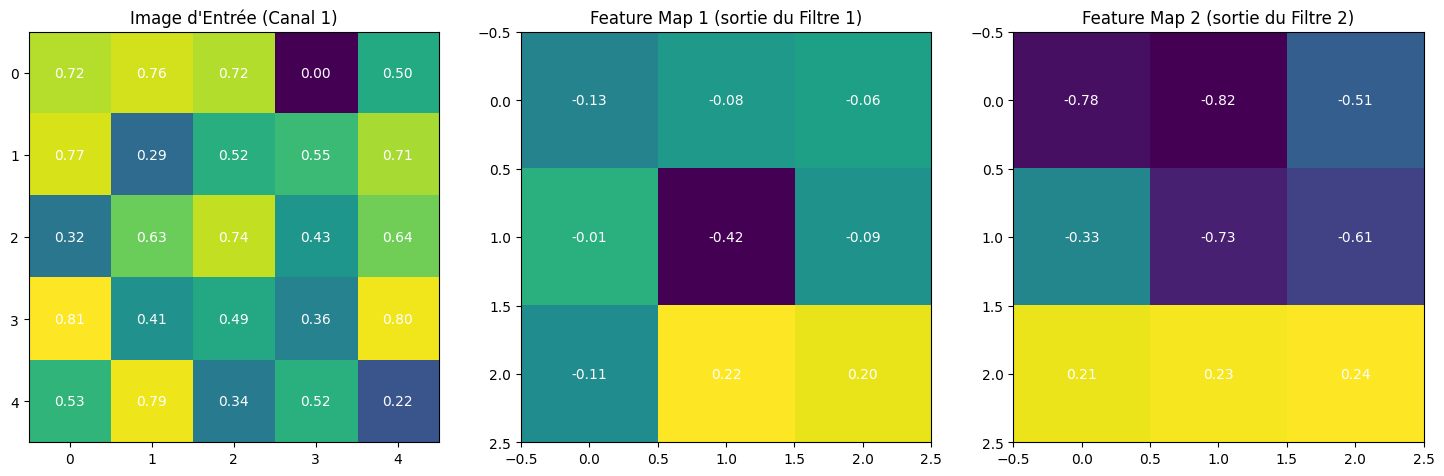

In [ ]:
# Créer les graphiques pour l'entrée et les deux sorties
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Afficher l'image d'entrée (Canal 1)
annotate_heatmap(axs[0], input_image[0, :, :, 0], "Image d'Entrée (Canal 1)")

# Afficher la première carte de caractéristiques
annotate_heatmap(axs[1], output_feature_maps[0, :, :, 0], "Feature Map 1 (sortie du Filtre 1)")

# Afficher la deuxième carte de caractéristiques
annotate_heatmap(axs[2], output_feature_maps[0, :, :, 1], "Feature Map 2 (sortie du Filtre 2)")

plt.show()

# Convolution with max pooling

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = tf.keras.Sequential([
    # 1. Votre couche de convolution personnalisée
    Conv2D(
        filters=2,
        kernel_size=(3, 3),
        input_shape=(5, 5, 3),
        strides=(2, 2),
        padding='same',
        use_bias=True,
        name='convolution_layer'
    ),
    # 2. La couche de Max Pooling ajoutée juste après
    MaxPooling2D(
        pool_size=(2, 2),
        name='maxpooling_layer',
        strides=(2, 2)
    )
])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolution_layer (Conv2D)      │ (None, 3, 3, 2)        │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling_layer (MaxPooling2D) │ (None, 1, 1, 2)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Le modèle a maintenant DEUX filtres distincts, initialisés au hasard.
output_feature_maps = model.predict(input_image)

print(f"Dimension des filtres : {model.layers[0].get_weights()[0].shape}")
print(f"Dimension de la sortie (feature maps) : {output_feature_maps.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Dimension des filtres : (3, 3, 3, 2)
Dimension de la sortie (feature maps) : (1, 1, 1, 2)


In [ ]:
# Fonction pour afficher une matrice avec les valeurs dans chaque case
def annotate_heatmap(ax, matrix, title):
    ax.imshow(matrix, cmap='viridis')
    ax.set_title(title)
    # Boucle sur chaque case pour y écrire sa valeur
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            # On formate à 2 décimales pour la lisibilité
            ax.text(j, i, f"{matrix[i, j]:.2f}",
                    ha="center", va="center", color="w")
    ax.grid(False)

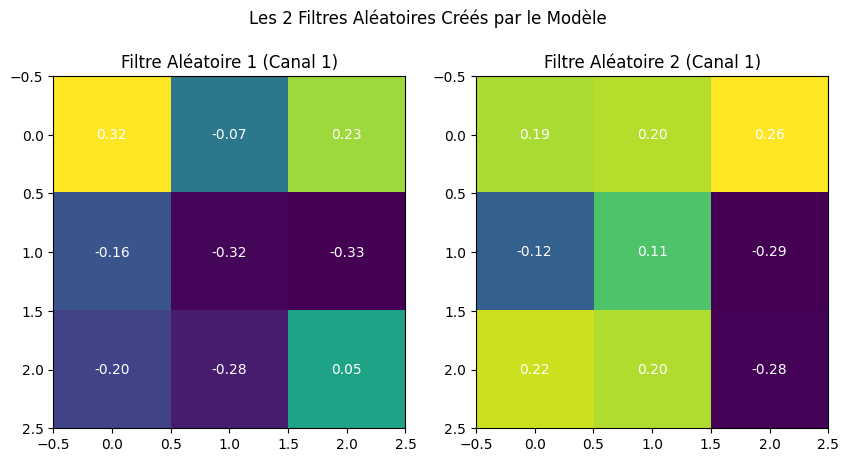

In [ ]:
# Extraire les deux filtres aléatoires que le modèle a créés
filters, _ = model.layers[0].get_weights()

# Créer les graphiques pour les deux filtres
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Les 2 Filtres Aléatoires Créés par le Modèle')

# Afficher le premier filtre (Canal 1)
annotate_heatmap(axs[0], filters[:, :, 0, 0], "Filtre Aléatoire 1 (Canal 1)")

# Afficher le deuxième filtre (Canal 1)
annotate_heatmap(axs[1], filters[:, :, 0, 1], "Filtre Aléatoire 2 (Canal 1)")

plt.show()

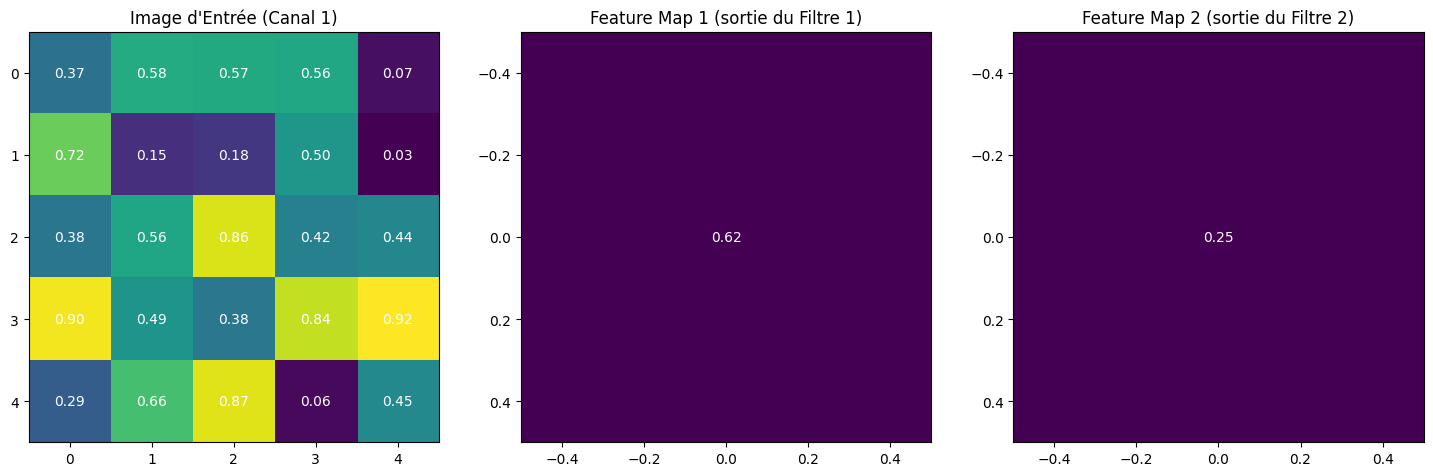

In [ ]:
# Créer les graphiques pour l'entrée et les deux sorties
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Afficher l'image d'entrée (Canal 1)
annotate_heatmap(axs[0], input_image[0, :, :, 0], "Image d'Entrée (Canal 1)")

# Afficher la première carte de caractéristiques
annotate_heatmap(axs[1], output_feature_maps[0, :, :, 0], "Feature Map 1 (sortie du Filtre 1)")

# Afficher la deuxième carte de caractéristiques
annotate_heatmap(axs[2], output_feature_maps[0, :, :, 1], "Feature Map 2 (sortie du Filtre 2)")

plt.show()

En ajustant sur le pool_size on obtient une matric feature map de 2x2 en opposé de 1x1 lorsque le pool size etait de (2,2)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = tf.keras.Sequential([
    # 1. Votre couche de convolution personnalisée
    Conv2D(
        filters=2,
        kernel_size=(3, 3),
        input_shape=(5, 5, 3),
        strides=(2, 2),
        padding='same',
        use_bias=True,
        name='convolution_layer'
    ),
    # 2. La couche de Max Pooling ajoutée juste après
    MaxPooling2D(
        pool_size=(1, 1),
        name='maxpooling_layer',
        strides=(2, 2)
    )
])

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolution_layer (Conv2D)      │ (None, 3, 3, 2)        │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling_layer (MaxPooling2D) │ (None, 2, 2, 2)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Le modèle a maintenant DEUX filtres distincts, initialisés au hasard.
output_feature_maps = model.predict(input_image)

print(f"Dimension des filtres : {model.layers[0].get_weights()[0].shape}")
print(f"Dimension de la sortie (feature maps) : {output_feature_maps.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Dimension des filtres : (3, 3, 3, 2)
Dimension de la sortie (feature maps) : (1, 2, 2, 2)


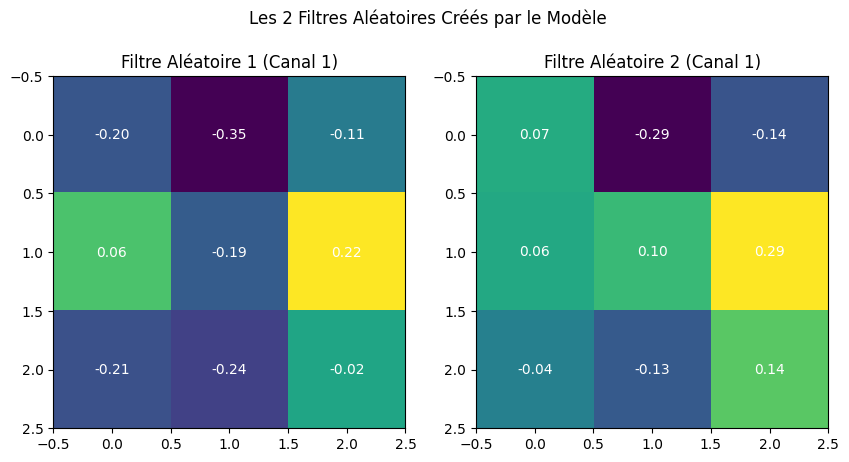

In [ ]:
# Extraire les deux filtres aléatoires que le modèle a créés
filters, _ = model.layers[0].get_weights()

# Créer les graphiques pour les deux filtres
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Les 2 Filtres Aléatoires Créés par le Modèle')

# Afficher le premier filtre (Canal 1)
annotate_heatmap(axs[0], filters[:, :, 0, 0], "Filtre Aléatoire 1 (Canal 1)")

# Afficher le deuxième filtre (Canal 1)
annotate_heatmap(axs[1], filters[:, :, 0, 1], "Filtre Aléatoire 2 (Canal 1)")

plt.show()

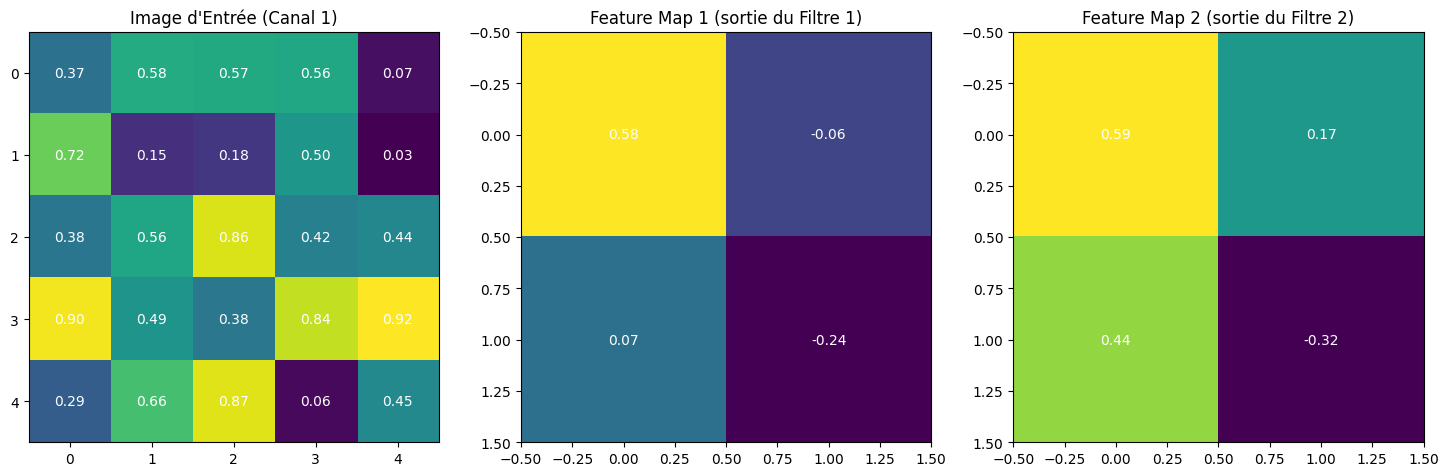

In [ ]:
# Créer les graphiques pour l'entrée et les deux sorties
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Afficher l'image d'entrée (Canal 1)
annotate_heatmap(axs[0], input_image[0, :, :, 0], "Image d'Entrée (Canal 1)")

# Afficher la première carte de caractéristiques
annotate_heatmap(axs[1], output_feature_maps[0, :, :, 0], "Feature Map 1 (sortie du Filtre 1)")

# Afficher la deuxième carte de caractéristiques
annotate_heatmap(axs[2], output_feature_maps[0, :, :, 1], "Feature Map 2 (sortie du Filtre 2)")

plt.show()

# Digitmnist and fashionmnist Dataset

## Partie 1 : Chiffres MNIST (Digits)

### Imports et Fonctions Utilitaires

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour afficher les courbes d'apprentissage
def plot_history(history, title):
    """Affiche les courbes de précision et de perte."""
    plt.figure(figsize=(12, 4))

    # Courbe de précision
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Courbe de perte
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.show()

### Chargement et Prétraitement des Données MNIST

In [ ]:
# Charger les données MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# 1. Redimensionner pour ajouter la dimension du canal (1 pour grayscale)
x_train_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(x_test_mnist.shape[0], 28, 28, 1)
input_shape_mnist = (28, 28, 1)

# 2. Normaliser les valeurs des pixels entre 0 et 1
x_train_mnist = x_train_mnist.astype('float32') / 255.0
x_test_mnist = x_test_mnist.astype('float32') / 255.0

# 3. One-hot encode les étiquettes
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

print("Format des données d'entraînement MNIST:", x_train_mnist.shape)
print("Format des étiquettes d'entraînement MNIST:", y_train_mnist.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Format des données d'entraînement MNIST: (60000, 28, 28, 1)
Format des étiquettes d'entraînement MNIST: (60000, 10)


### Architectures CNN pour MNIST

#### Modèle 1 : Un CNN Simple (Baseline)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8569 - loss: 0.5166 - val_accuracy: 0.9748 - val_loss: 0.0954
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0863 - val_accuracy: 0.9827 - val_loss: 0.0632
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0565 - val_accuracy: 0.9865 - val_loss: 0.0564
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0426 - val_accuracy: 0.9860 - val_loss: 0.0529
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0290 - val_accuracy: 0.9865 - val_loss: 0.0497
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9922 - loss: 0.0248 - val_accuracy: 0.9867 - val_loss: 0.0512
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0179 - val_accuracy: 0.9863 - val_loss: 0.0552
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9962 - loss: 0.0130 - val_accuracy: 0.

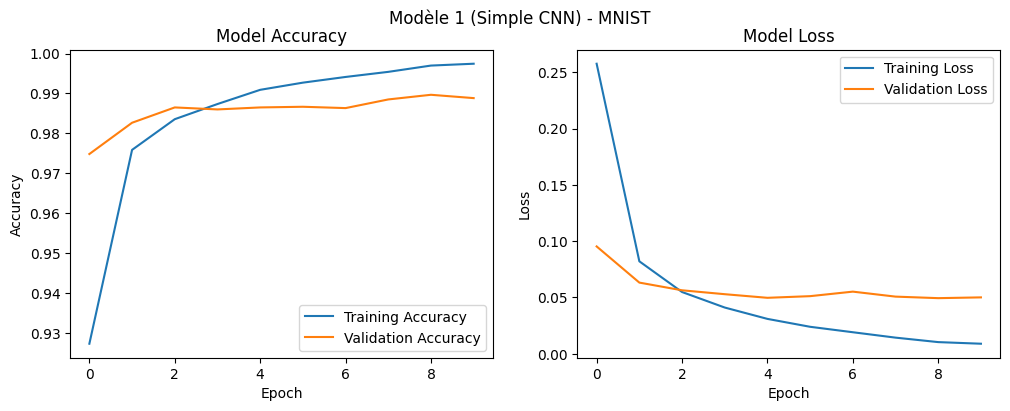

Modèle 1 - Précision sur les données de test : 98.73%


In [ ]:
# Définition du Modèle 1
model_1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape_mnist),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

# Entraînement
history_1 = model_1.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=128, validation_split=0.1)
plot_history(history_1, 'Modèle 1 (Simple CNN) - MNIST')

# Évaluation
score_1 = model_1.evaluate(x_test_mnist, y_test_mnist, verbose=0)
print(f'Modèle 1 - Précision sur les données de test : {score_1[1]*100:.2f}%')

#### Modèle 2 : Un CNN plus Profond

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8512 - loss: 0.5250 - val_accuracy: 0.9795 - val_loss: 0.0722
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9800 - loss: 0.0656 - val_accuracy: 0.9873 - val_loss: 0.0485
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.9893 - val_loss: 0.0425
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9903 - loss: 0.0293 - val_accuracy: 0.9897 - val_loss: 0.0384
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9927 - loss: 0.0242 - val_accuracy: 0.9892 - val_loss: 0.0390
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9937 - loss: 0.0201 - val_accuracy: 0.9898 - val_loss: 0.0363
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9961 - loss: 0.0139 - val_accuracy: 0.9913 - val_loss: 0.0344
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.

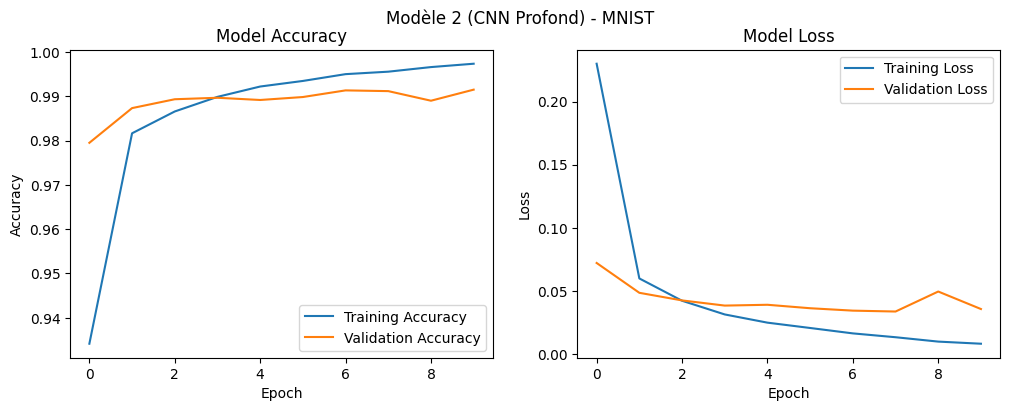

Modèle 2 - Précision sur les données de test : 99.21%


In [ ]:
# Définition du Modèle 2
model_2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape_mnist),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

# Entraînement
history_2 = model_2.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=128, validation_split=0.1)
plot_history(history_2, 'Modèle 2 (CNN Profond) - MNIST')

# Évaluation
score_2 = model_2.evaluate(x_test_mnist, y_test_mnist, verbose=0)
print(f'Modèle 2 - Précision sur les données de test : {score_2[1]*100:.2f}%')

#### Modèle 3 : CNN Profond avec Dropout (Régularisation)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7485 - loss: 0.7601 - val_accuracy: 0.9792 - val_loss: 0.0710
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9572 - loss: 0.1423 - val_accuracy: 0.9865 - val_loss: 0.0488
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9712 - loss: 0.0976 - val_accuracy: 0.9877 - val_loss: 0.0396
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9755 - loss: 0.0810 - val_accuracy: 0.9895 - val_loss: 0.0325
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9783 - loss: 0.0708 - val_accuracy: 0.9898 - val_loss: 0.0322
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9815 - loss: 0.0644 - val_accuracy: 0.9895 - val_loss: 0.0325
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9824 - loss: 0.0578 - val_accuracy: 0.9910 - val_loss: 0.0302
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0522 - val_accuracy: 

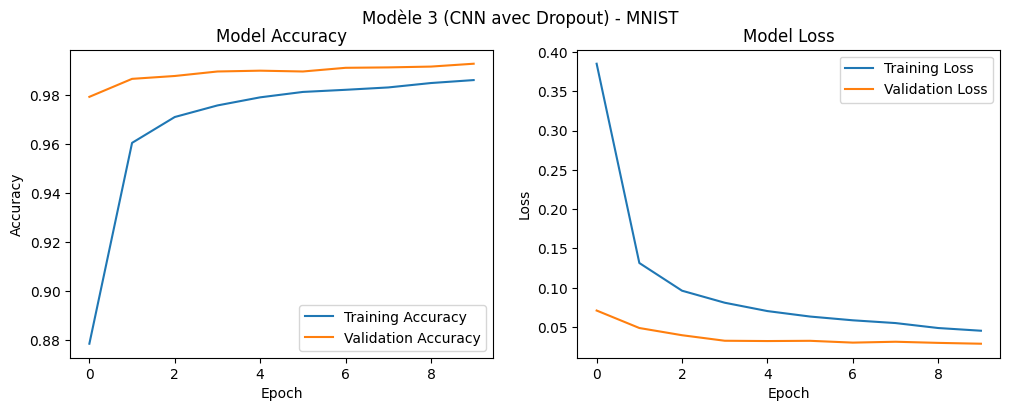

Modèle 3 - Précision sur les données de test : 99.16%


In [ ]:
# Définition du Modèle 3
model_3 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape_mnist),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Ajout de Dropout après le pooling
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Ajout de Dropout
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),   # Ajout de Dropout avant la couche de sortie
    Dense(10, activation='softmax')
])

# Compilation
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

# Entraînement
history_3 = model_3.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=128, validation_split=0.1)
plot_history(history_3, 'Modèle 3 (CNN avec Dropout) - MNIST')

# Évaluation
score_3 = model_3.evaluate(x_test_mnist, y_test_mnist, verbose=0)
print(f'Modèle 3 - Précision sur les données de test : {score_3[1]*100:.2f}%')

## Partie 2 : Articles de Mode (Fashion-MNIST)

### Chargement et Prétraitement des Données Fashion-MNIST

In [ ]:
# Charger les données Fashion-MNIST
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Le prétraitement est identique à celui de MNIST
x_train_fashion = x_train_fashion.reshape(x_train_fashion.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test_fashion = x_test_fashion.reshape(x_test_fashion.shape[0], 28, 28, 1).astype('float32') / 255.0
y_train_fashion = to_categorical(y_train_fashion, 10)
y_test_fashion = to_categorical(y_test_fashion, 10)

print("Format des données d'entraînement Fashion-MNIST:", x_train_fashion.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Format des données d'entraînement Fashion-MNIST: (60000, 28, 28, 1)


### Entraînement des Modèles sur Fashion-MNIST

#### Modèle 1-F : Un CNN Simple (Baseline)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7739 - loss: 0.6718 - val_accuracy: 0.8765 - val_loss: 0.3511
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8854 - loss: 0.3261 - val_accuracy: 0.8958 - val_loss: 0.3012
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8989 - loss: 0.2844 - val_accuracy: 0.8987 - val_loss: 0.2818
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9105 - loss: 0.2453 - val_accuracy: 0.9062 - val_loss: 0.2656
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9208 - loss: 0.2201 - val_accuracy: 0.9077 - val_loss: 0.2601
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9311 - loss: 0.1939 - val_accuracy: 0.9122 - val_loss: 0.2491
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9371 - loss: 0.1795 - val_accuracy: 0.9128 - val_loss: 0.2453
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9385 - loss: 0.1688 - val_accuracy: 0.

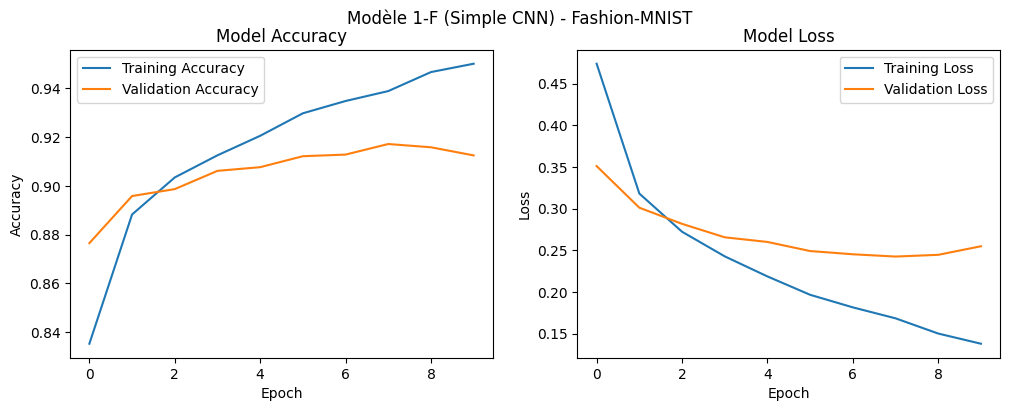

Modèle 1-F - Précision sur les données de test : 91.19%


In [ ]:
# Définition du Modèle 1 pour Fashion-MNIST
model_1_fashion = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation
model_1_fashion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1_fashion.summary()

# Entraînement
history_1_fashion = model_1_fashion.fit(x_train_fashion, y_train_fashion, epochs=10, batch_size=128, validation_split=0.1)
plot_history(history_1_fashion, 'Modèle 1-F (Simple CNN) - Fashion-MNIST')

# Évaluation
score_1_fashion = model_1_fashion.evaluate(x_test_fashion, y_test_fashion, verbose=0)
print(f'Modèle 1-F - Précision sur les données de test : {score_1_fashion[1]*100:.2f}%')

#### Un CNN plus Profond

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7110 - loss: 0.8324 - val_accuracy: 0.8588 - val_loss: 0.3922
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8698 - loss: 0.3716 - val_accuracy: 0.8798 - val_loss: 0.3378
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8843 - loss: 0.3251 - val_accuracy: 0.8932 - val_loss: 0.3081
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8962 - loss: 0.2838 - val_accuracy: 0.8930 - val_loss: 0.3033
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9030 - loss: 0.2686 - val_accuracy: 0.9018 - val_loss: 0.2763
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9135 - loss: 0.2405 - val_accuracy: 0.9065 - val_loss: 0.2631
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9174 - loss: 0.2299 - val_accuracy: 0.9125 - val_loss: 0.2459
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9239 - loss: 0.2109 - val_accuracy: 0

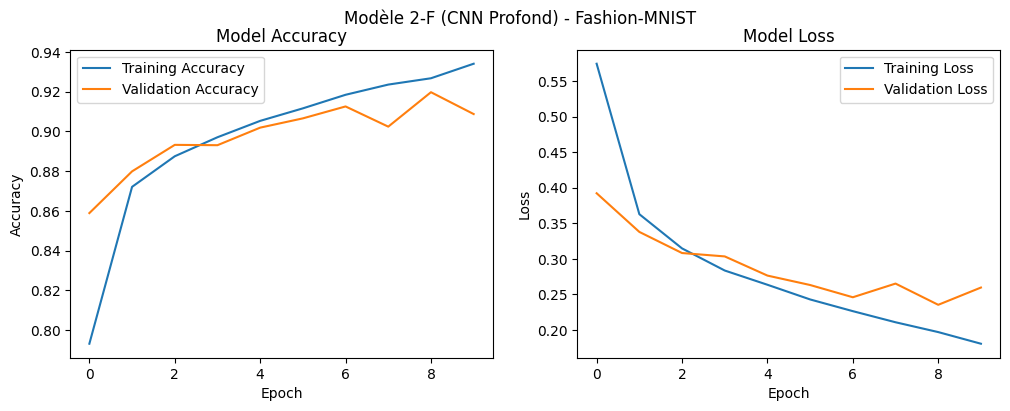

Modèle 2-F - Précision sur les données de test : 89.99%


In [ ]:
# Définition du Modèle 2 pour Fashion-MNIST
model_2_fashion = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation
model_2_fashion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2_fashion.summary()

# Entraînement
history_2_fashion = model_2_fashion.fit(x_train_fashion, y_train_fashion, epochs=10, batch_size=128, validation_split=0.1)
plot_history(history_2_fashion, 'Modèle 2-F (CNN Profond) - Fashion-MNIST')

# Évaluation
score_2_fashion = model_2_fashion.evaluate(x_test_fashion, y_test_fashion, verbose=0)
print(f'Modèle 2-F - Précision sur les données de test : {score_2_fashion[1]*100:.2f}%')

#### CNN Profond avec Dropout (Régularisation)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6366 - loss: 0.9938 - val_accuracy: 0.8403 - val_loss: 0.4355
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8236 - loss: 0.4881 - val_accuracy: 0.8678 - val_loss: 0.3592
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8467 - loss: 0.4224 - val_accuracy: 0.8775 - val_loss: 0.3317
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8624 - loss: 0.3875 - val_accuracy: 0.8835 - val_loss: 0.3044
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8683 - loss: 0.3623 - val_accuracy: 0.8928 - val_loss: 0.2924
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8765 - loss: 0.3366 - val_accuracy: 0.8948 - val_loss: 0.2787
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8853 - loss: 0.3207 - val_accuracy: 0.8912 - val_loss: 0.2814
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8891 - loss: 0.3083 - val_accuracy: 

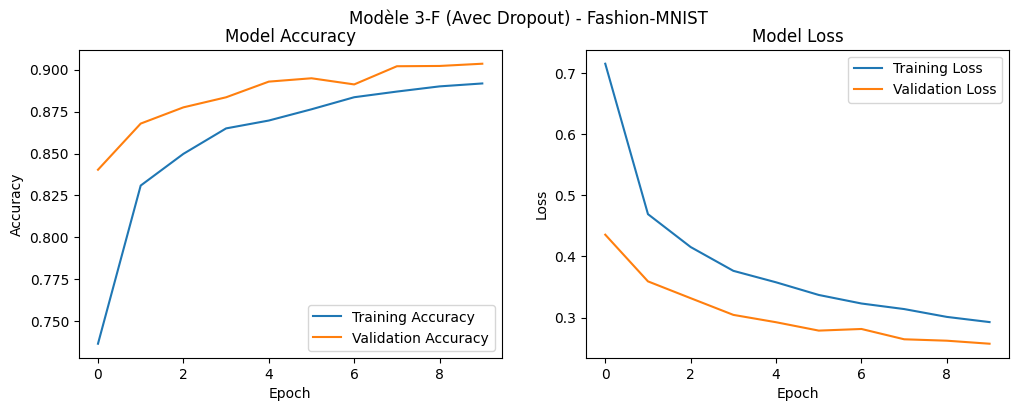

Modèle 3-F - Précision sur les données de test : 89.47%


In [ ]:
# Définition du Modèle 3 pour Fashion-MNIST
model_3_fashion = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilation
model_3_fashion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3_fashion.summary()

# Entraînement
history_3_fashion = model_3_fashion.fit(x_train_fashion, y_train_fashion, epochs=10, batch_size=128, validation_split=0.1)
plot_history(history_3_fashion, 'Modèle 3-F (Avec Dropout) - Fashion-MNIST')

# Évaluation
score_3_fashion = model_3_fashion.evaluate(x_test_fashion, y_test_fashion, verbose=0)
print(f'Modèle 3-F - Précision sur les données de test : {score_3_fashion[1]*100:.2f}%')

## Tableau Comparatif des Précisions

In [ ]:
# Assurez-vous d'avoir exécuté les entraînements pour que les variables 'score' existent
# MNIST Scores (from the first part)
score_1 = model_1.evaluate(x_test_mnist, y_test_mnist, verbose=0)
score_2 = model_2.evaluate(x_test_mnist, y_test_mnist, verbose=0)
score_3 = model_3.evaluate(x_test_mnist, y_test_mnist, verbose=0)

# Fashion-MNIST Scores (from this part)
score_1_fashion = model_1_fashion.evaluate(x_test_fashion, y_test_fashion, verbose=0)
score_2_fashion = model_2_fashion.evaluate(x_test_fashion, y_test_fashion, verbose=0)
score_3_fashion = model_3_fashion.evaluate(x_test_fashion, y_test_fashion, verbose=0)


# Affichage du tableau de comparaison
print("="*45)
print("RÉSUMÉ FINAL DES PERFORMANCES (PRÉCISION TEST)")
print("="*45)

print("\n--- Dataset: MNIST Digits ---")
print(f"Modèle 1 (Simple CNN):       {score_1[1]*100:.2f}%")
print(f"Modèle 2 (CNN Profond):      {score_2[1]*100:.2f}%")
print(f"Modèle 3 (Avec Dropout):     {score_3[1]*100:.2f}%")

print("\n--- Dataset: Fashion-MNIST ---")
print(f"Modèle 1-F (Simple CNN):     {score_1_fashion[1]*100:.2f}%")
print(f"Modèle 2-F (CNN Profond):    {score_2_fashion[1]*100:.2f}%")
print(f"Modèle 3-F (Avec Dropout):   {score_3_fashion[1]*100:.2f}%")
print("-"*45)

RÉSUMÉ FINAL DES PERFORMANCES (PRÉCISION TEST)

--- Dataset: MNIST Digits ---
Modèle 1 (Simple CNN):       98.73%
Modèle 2 (CNN Profond):      99.21%
Modèle 3 (Avec Dropout):     99.16%

--- Dataset: Fashion-MNIST ---
Modèle 1-F (Simple CNN):     91.19%
Modèle 2-F (CNN Profond):    90.61%
Modèle 3-F (Avec Dropout):   89.47%
---------------------------------------------


Pour un problème simple comme **MNIST**, un modèle plus complexe est meilleur car il affine les détails. Pour un problème difficile comme **Fashion-MNIST**, le modèle plus simple gagne car les architectures complexes souffrent de surapprentissage (overfitting) : elles mémorisent les données d'entraînement au lieu de généraliser.

La meilleure architecture est donc un équilibre entre la puissance du modèle et la complexité de la tâche.

## Visulaisation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Affichage de l'image originale (à gauche) et des 16 premières feature maps (à droite)...


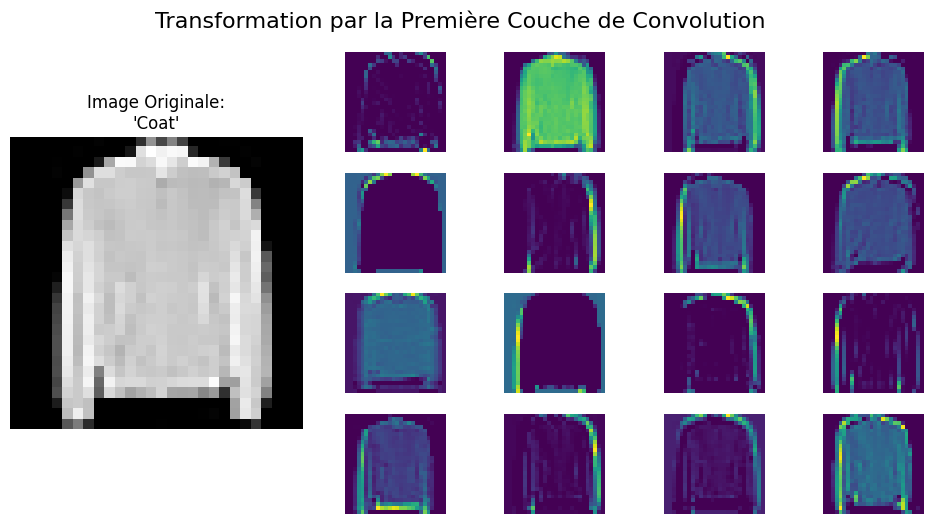

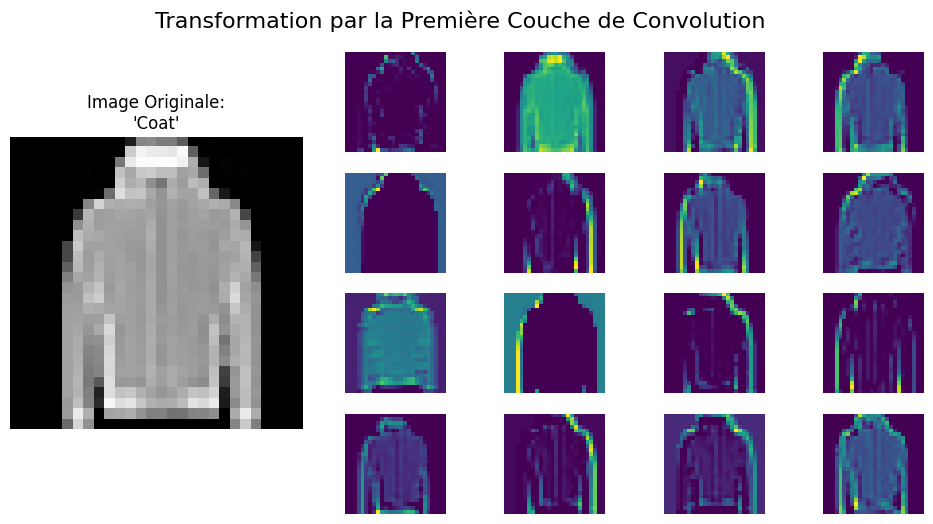

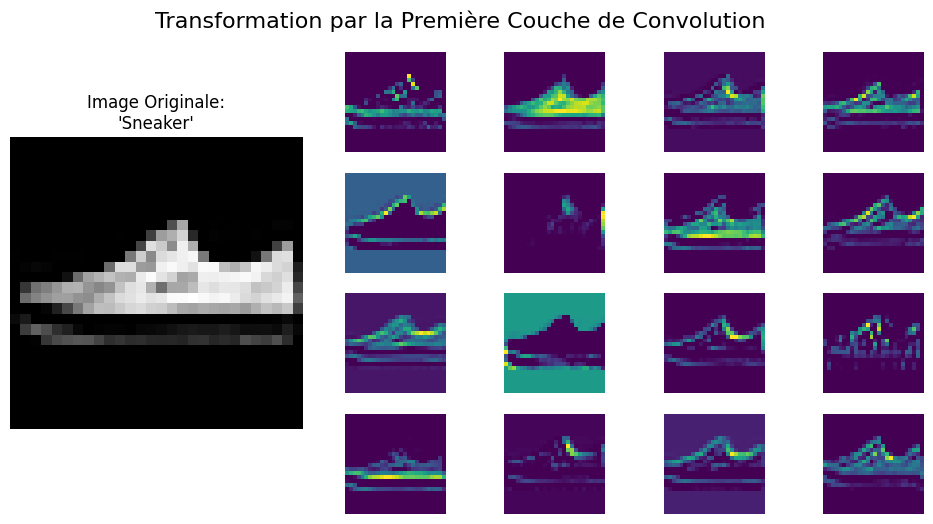

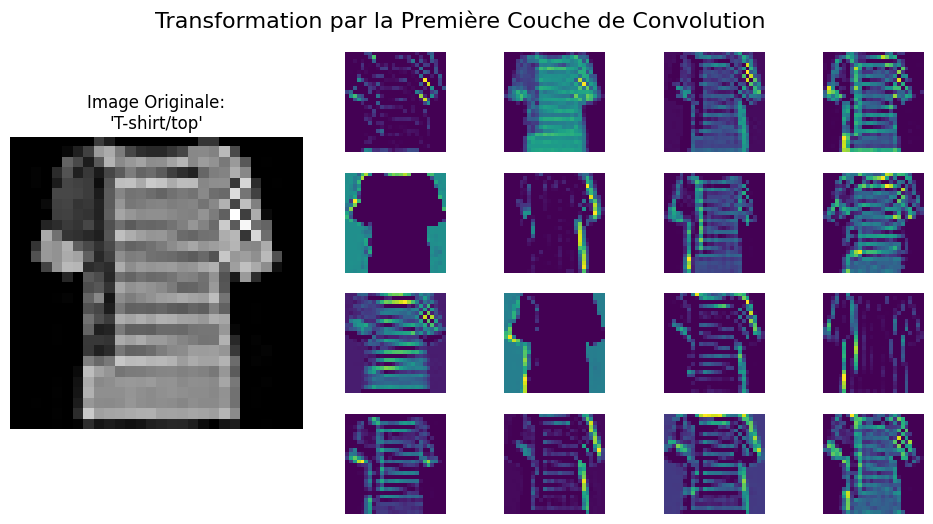

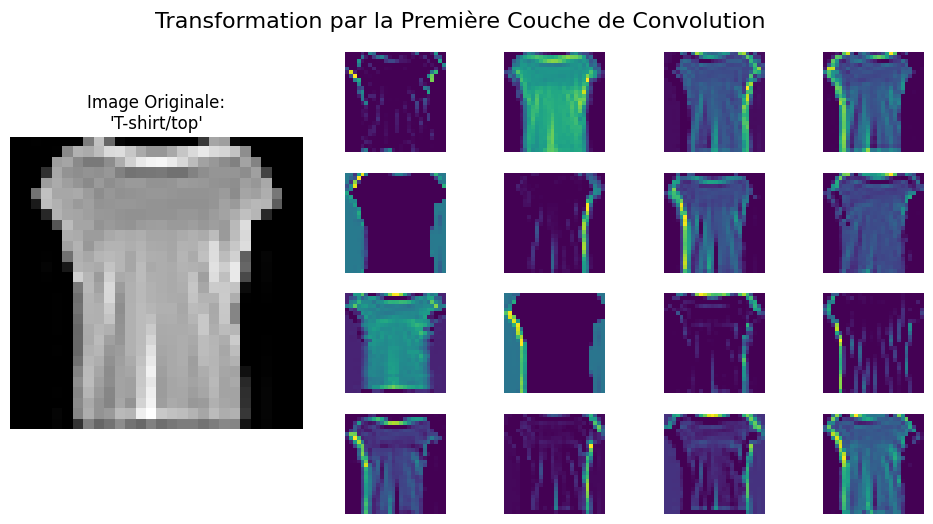

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Model

# Noms des classes pour un affichage clair des étiquettes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --- Étape 1: Isoler la première couche de convolution ---
# On crée un nouveau modèle qui s'arrête juste après la première couche 'conv_1'
conv1_layer_model = Model(inputs=model_functional.input,
                          outputs=model_functional.get_layer('conv_1').output)

# --- Étape 2: Sélectionner 5 images de test au hasard ---
num_images_to_show = 5
random_indices = np.random.choice(len(x_test), num_images_to_show, replace=False)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

# Obtenir les "feature maps" pour ces 5 images en une seule fois
conv_feature_maps = conv1_layer_model.predict(sample_images)

# --- Étape 3: Afficher les résultats pour chaque image ---
print("Affichage de l'image originale (à gauche) et des 16 premières feature maps (à droite)...")

for i in range(num_images_to_show):
    true_label_name = class_names[np.argmax(sample_labels[i])]

    # On utilise GridSpec pour un affichage plus flexible
    fig = plt.figure(figsize=(12, 6))
    gs = fig.add_gridspec(4, 6) # Grille de 4 lignes et 6 colonnes

    # Afficher l'image originale sur la partie gauche (elle prend 2 colonnes de large)
    ax_original = fig.add_subplot(gs[:, 0:2])
    ax_original.imshow(sample_images[i].squeeze(), cmap='gray')
    ax_original.set_title(f"Image Originale:\n'{true_label_name}'")
    ax_original.axis('off')

    # Afficher les 16 premières feature maps sur la partie droite (une grille 4x4)
    fig.suptitle("Transformation par la Première Couche de Convolution", fontsize=16, y=0.95)

    for j in range(16):
        row = j // 4
        col = j % 4
        # On place chaque feature map dans la grille à droite de l'image originale
        ax_map = fig.add_subplot(gs[row, col + 2])
        ax_map.imshow(conv_feature_maps[i, :, :, j], cmap='viridis')
        ax_map.axis('off')

    plt.show()

Model: "functional_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)


Début de l'entraînement du modèle fonctionnel...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6991 - loss: 0.8527 - val_accuracy: 0.8617 - val_loss: 0.3886
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8640 - loss: 0.3807 - val_accuracy: 0.8752 - val_loss: 0.3531
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8809 - loss: 0.3282 - val_accuracy: 0.8877 - val_loss: 0.3158
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8961 - loss: 0.2882 - val_accuracy: 0.8928 - val_loss: 0.2981
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9010 - loss: 0.2696 - val_accuracy: 0.8973 - val_loss: 0.2879
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9086 - loss: 0.2507 - val_accuracy: 0.9017 - val_loss: 0.2794
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9154 - loss: 0.2294 - val_accuracy: 0.9085 - val_loss: 0.2632
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step -

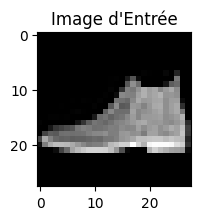

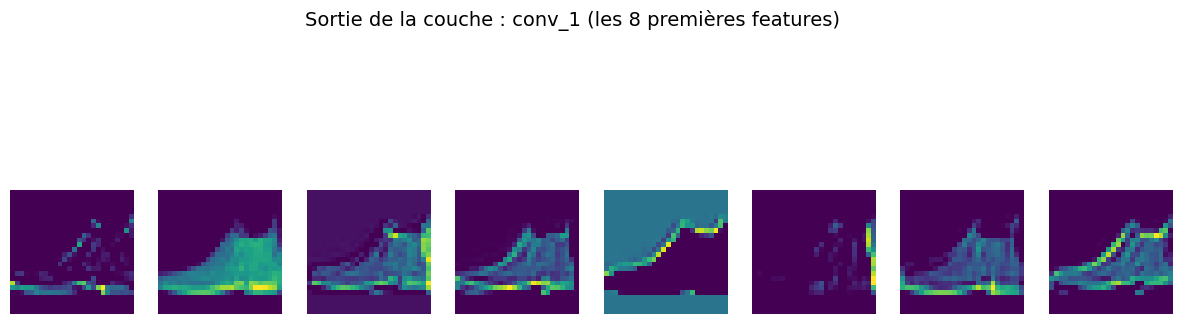

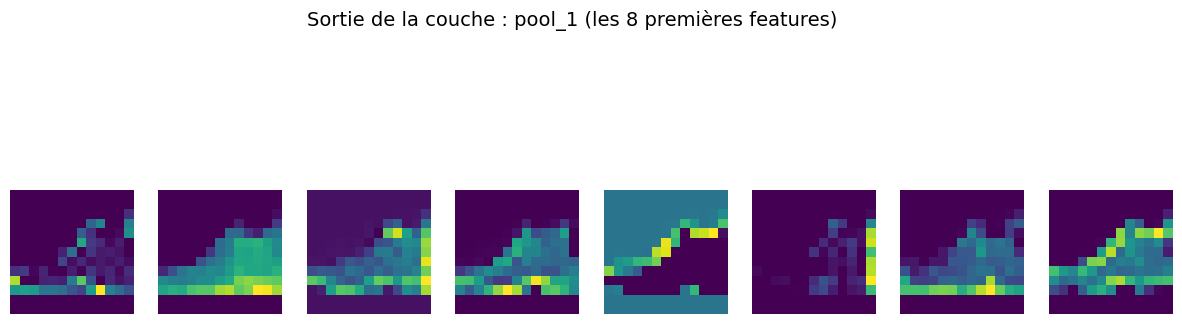

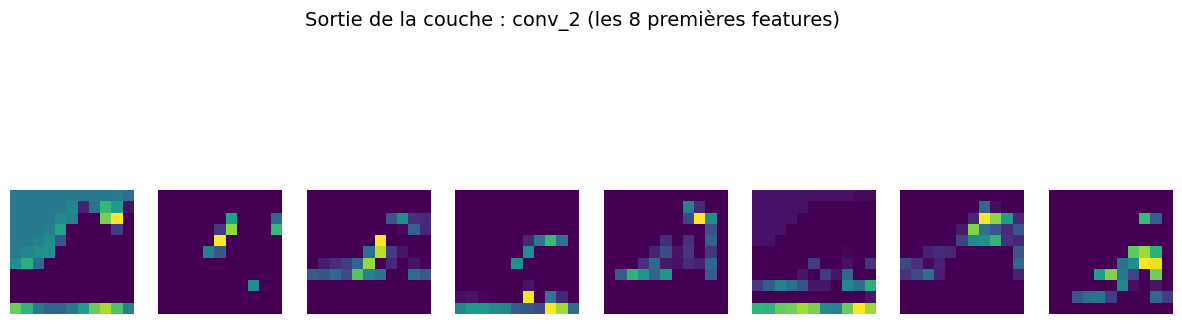

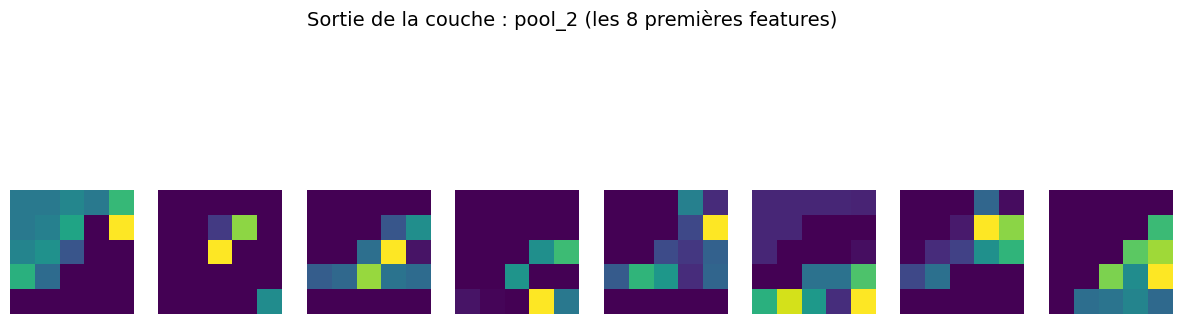

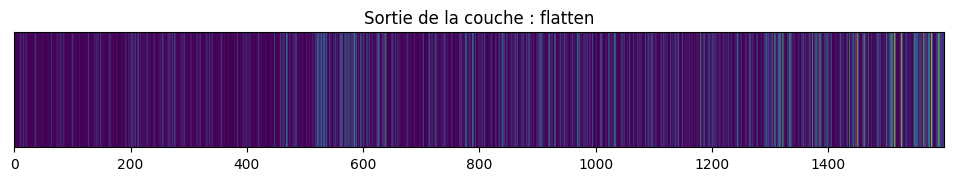

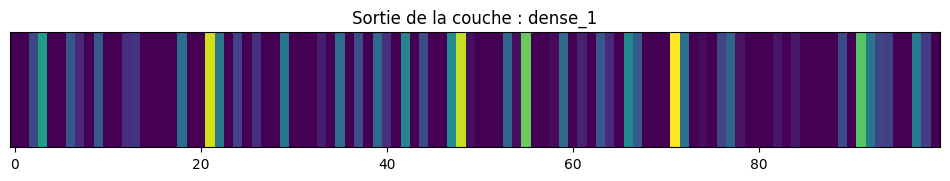

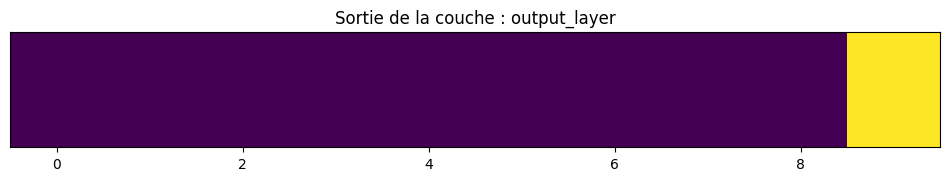

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Préparation des Données ---
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# --- 2. Définition du Modèle avec l'API Fonctionnelle (SOLUTION DÉFINITIVE) ---
# On définit d'abord le tenseur d'entrée
inputs = Input(shape=(28, 28, 1), name='input_layer')

# On enchaîne les couches en les connectant manuellement
x = Conv2D(32, kernel_size=(3, 3), activation='relu', name='conv_1')(inputs)
x = MaxPooling2D(pool_size=(2, 2), name='pool_1')(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv_2')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool_2')(x)
x = Flatten(name='flatten')(x)
x = Dense(100, activation='relu', name='dense_1')(x)
outputs = Dense(10, activation='softmax', name='output_layer')(x)

# On crée le modèle final en spécifiant ses entrées et ses sorties
model_functional = Model(inputs=inputs, outputs=outputs, name="functional_cnn")

model_functional.summary()

# --- 3. Compilation et Entraînement ---
model_functional.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("\nDébut de l'entraînement du modèle fonctionnel...")
model_functional.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=1)

# --- 4. Visualisation (sans erreur) ---
print("\nLancement de la visualisation...")
img_to_visualize = x_test[0]
img_to_visualize_expanded = np.expand_dims(img_to_visualize, axis=0)

# Le modèle fonctionnel a un .input et .layers clairement définis, donc ceci fonctionne.
# On exclut la première couche (Input) qui n'a pas de "sortie" intéressante à visualiser.
layer_outputs = [layer.output for layer in model_functional.layers[1:]]
layer_names = [layer.name for layer in model_functional.layers[1:]]

visualization_model = Model(inputs=model_functional.input, outputs=layer_outputs)
feature_maps = visualization_model.predict(img_to_visualize_expanded)

# Affichage de l'image originale
plt.figure(figsize=(2,2))
plt.title("Image d'Entrée")
plt.imshow(img_to_visualize.squeeze(), cmap='gray')
plt.grid(False); plt.show()

# Boucle pour visualiser les sorties des couches
for name, f_map in zip(layer_names, feature_maps):
    if len(f_map.shape) == 4: # Couches Conv/Pool
        n_features = f_map.shape[-1]
        fig, axes = plt.subplots(1, min(n_features, 8), figsize=(15, 5))
        fig.suptitle(f"Sortie de la couche : {name} (les 8 premières features)", fontsize=14)
        for i in range(min(n_features, 8)):
            ax = axes[i] if min(n_features, 8) > 1 else axes
            ax.imshow(f_map[0, :, :, i], cmap='viridis')
            ax.axis('off')
        plt.show()
    elif len(f_map.shape) == 2: # Couches Flatten/Dense
        plt.figure(figsize=(12, 1.5))
        plt.title(f"Sortie de la couche : {name}")
        plt.imshow(f_map, aspect='auto', cmap='viridis')
        plt.yticks([])
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


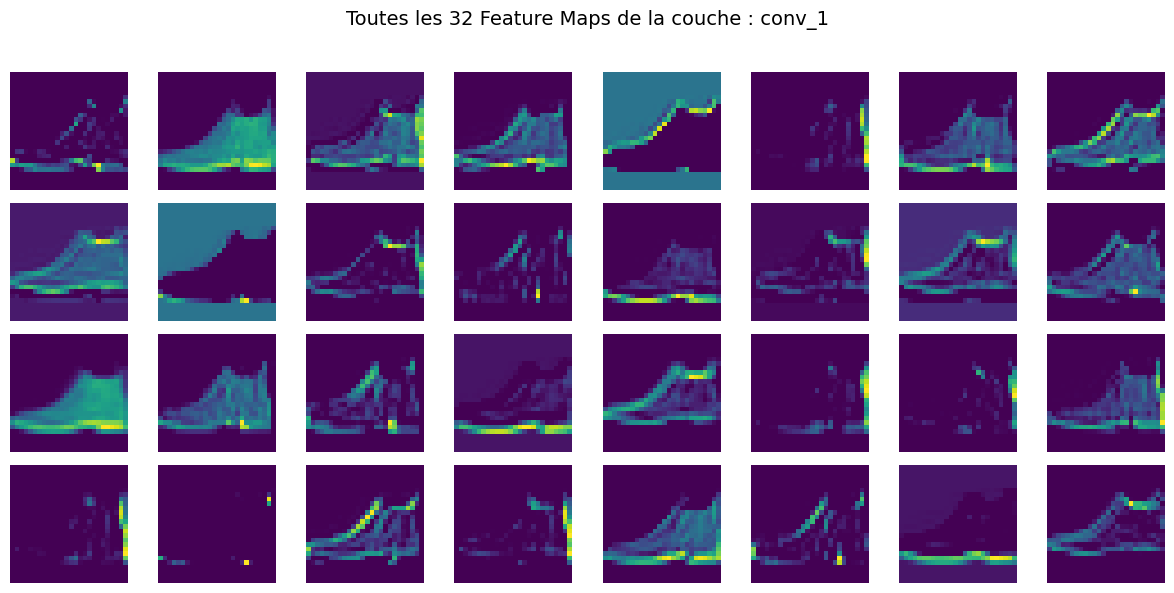

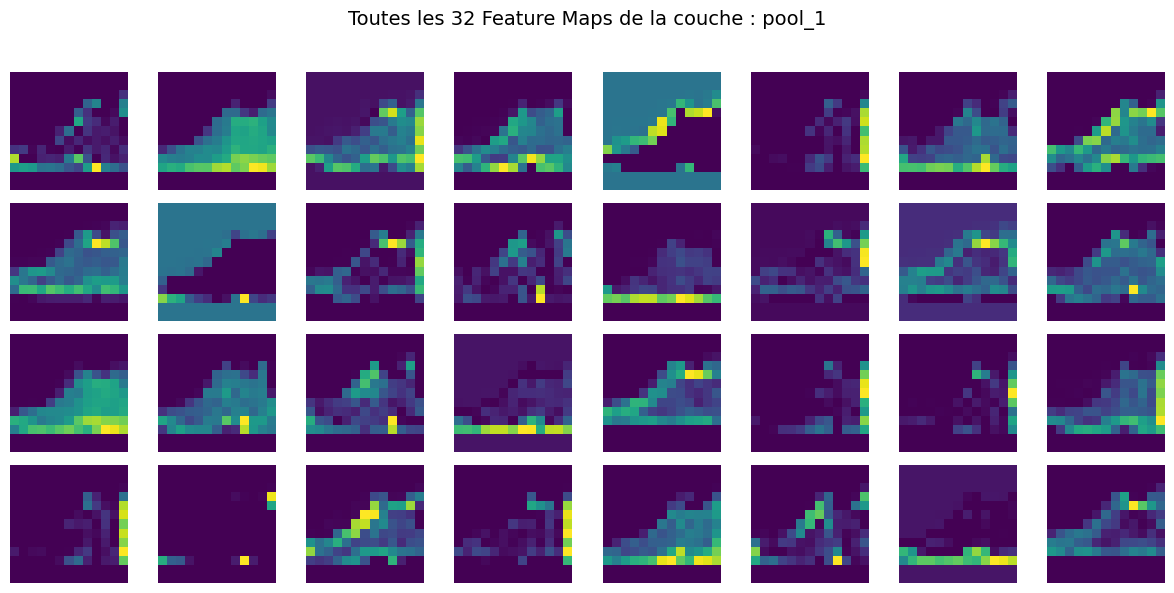

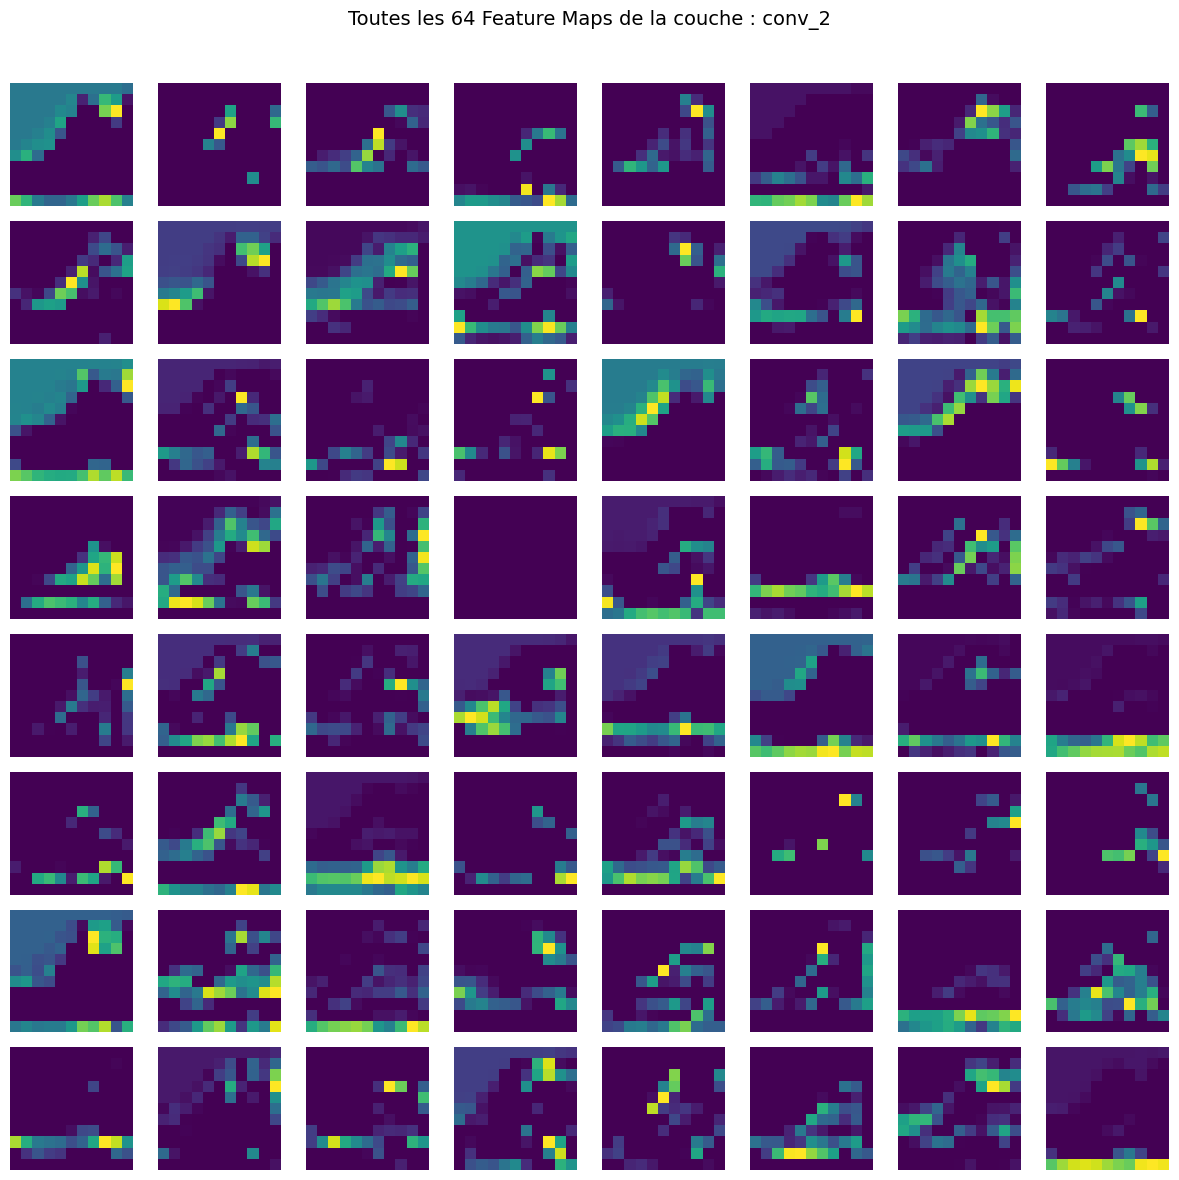

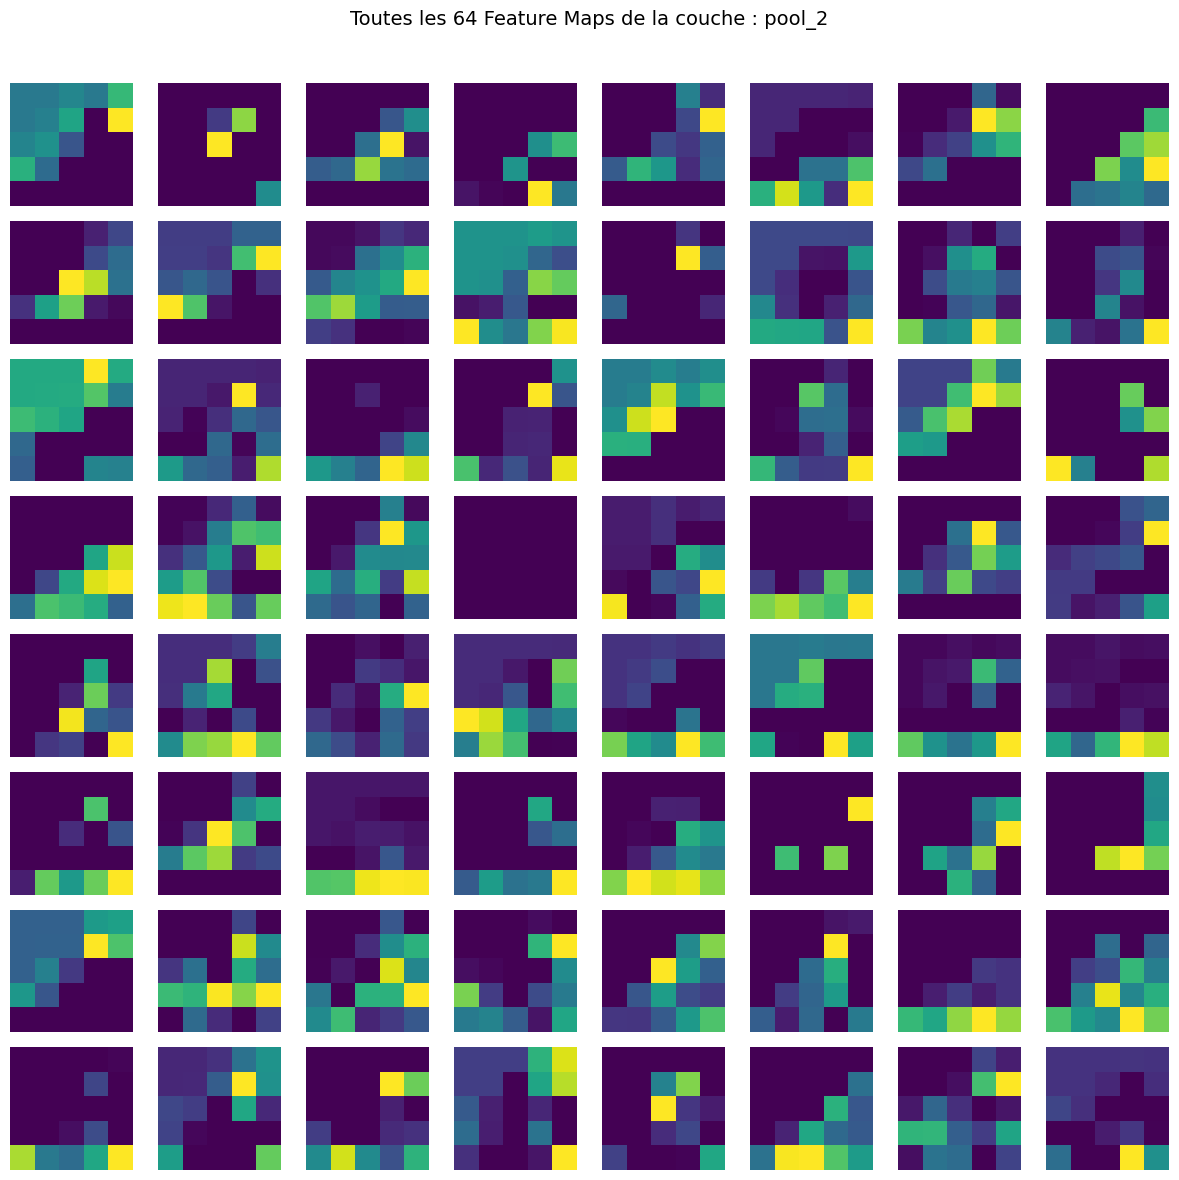

In [ ]:
import math
import matplotlib.pyplot as plt

# --- 1. Préparation (comme avant) ---
# On s'assure que le modèle fonctionnel est entraîné et que l'image est prête.
# model_functional.fit(...)

img_to_visualize_expanded = np.expand_dims(x_test[0], axis=0) # On prend la même bottine

# --- 2. Création du Modèle de Visualisation (comme avant) ---
layer_outputs = [layer.output for layer in model_functional.layers[1:]]
layer_names = [layer.name for layer in model_functional.layers[1:]]

visualization_model = tf.keras.Model(inputs=model_functional.input, outputs=layer_outputs)
feature_maps = visualization_model.predict(img_to_visualize_expanded)

# --- 3. Boucle de Visualisation Mise à Jour ---
# Cette boucle affiche maintenant TOUTES les features, pas seulement les 8 premières.

for name, f_map in zip(layer_names, feature_maps):
    # On ne visualise que les couches qui ont des feature maps 2D (Conv et Pool)
    if len(f_map.shape) == 4:
        n_features = f_map.shape[-1]

        # On calcule la taille de la grille pour afficher toutes les features
        n_cols = 8 # On fixe le nombre de colonnes à 8 pour une bonne lisibilité
        n_rows = math.ceil(n_features / n_cols)

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.5 * n_cols, 1.5 * n_rows))
        fig.suptitle(f"Toutes les {n_features} Feature Maps de la couche : {name}", fontsize=14)

        # On aplatit le tableau d'axes pour une boucle simple
        axes = axes.flatten()

        for i in range(n_features):
            ax = axes[i]
            # On normalise pour un meilleur contraste
            feature = f_map[0, :, :, i]
            ax.imshow(feature, cmap='viridis')
            ax.axis('off')

        # On cache les sous-graphiques inutilisés
        for i in range(n_features, len(axes)):
            axes[i].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()